In [1]:
import predictor_class
import numpy as np
import tensorflow as tf
import pandas as pd
import yfinance as yf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import strategy_class

# needs to be reprofiled for russian/chinese securities, also add more risk management

In [2]:
securities = [yf.download('baba', period='60d', interval='5m'), yf.download('tcehy', period='60d', interval='5m'), yf.download('vips', period='60d', interval='5m'), yf.download('tme', period='60d', interval='5m'),
              yf.download('jd', period='60d', interval='5m'),yf.download('bidu', period='60d', interval='5m'),yf.download('wb', period='60d', interval='5m'), yf.download('momo', period='60d', interval='5m')]

l = [layers.Conv1D(100, kernel_size=2, strides=(2), padding='same', input_shape = [5, 7, 1], activation='sigmoid'),
        layers.MaxPooling2D((1, 2)),
        layers.LeakyReLU(),
        layers.BatchNormalization(),
        layers.Dropout(0.15),

        layers.Conv1D(50, kernel_size=3, strides=(2), padding='same', activation='sigmoid'),
        layers.LeakyReLU(),
        layers.Dropout(0.15),

        layers.Flatten(),
        layers.Dense(50, activation='sigmoid'),
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='relu')]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [11]:
goog_estimator_s1 = predictor_class.predictor(l, optimizer = tf.keras.optimizers.legacy.Adam(0.001), scope = 1)
goog_estimator_s2 = predictor_class.predictor(l, optimizer = tf.keras.optimizers.legacy.Adam(0.001), scope = 2)
goog_estimator_s3 = predictor_class.predictor(l, optimizer = tf.keras.optimizers.legacy.Adam(0.001), scope = 3)
goog_estimator_s4 = predictor_class.predictor(l, optimizer = tf.keras.optimizers.legacy.Adam(0.001), scope = 4)
goog_estimator_s5 = predictor_class.predictor(l, optimizer = tf.keras.optimizers.legacy.Adam(0.001), scope = 5) #tcehy estimators

squad = [est for est in [goog_estimator_s1, goog_estimator_s2, goog_estimator_s3, goog_estimator_s4, goog_estimator_s5]]
lsis = [] #list of labels for examining bias of each scope
for each in squad:
    for s in securities:
        ins = predictor_class.createdataset(s)
        tr, lsi = predictor_class.get_trainingdata(ins, scope=each.scope)
        each.train(tr, lsi, epochs = 1)

goog_lsis = []
goog_trs = []
secu = yf.download('tcehy', period='60d', interval='5m')
ins = predictor_class.createdataset(secu)
for est in squad:
    training_data, labels1 = predictor_class.get_trainingdata(ins, scope = est.scope)
    goog_trs.append(training_data)
    goog_lsis.append(labels1)
    est.examine_bias(secu, goog_trs[est.scope-1][-1000:], goog_lsis[est.scope-1][-1000:])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 1s 2ms/step - loss: 8492.4580


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1778.3333


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 267.2415


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 45.1064


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1249.5216


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 19873.1484


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 180.1809


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 88.8818


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 1s 2ms/step - loss: 8492.7744


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1778.3195


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 267.2390


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 45.1039


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1249.5254


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 19872.9727


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 180.1814


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 88.8802


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 1s 2ms/step - loss: 8493.0889


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1778.3037


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 267.2367


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 45.1014


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1249.5298


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 19872.8066


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 180.1818


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 88.8786


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 1s 2ms/step - loss: 8493.3994


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1778.2883


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 267.2343


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 45.0990


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1249.5338


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 19872.6191


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 180.1823


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 3ms/step - loss: 88.8769


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 1s 2ms/step - loss: 8493.7080


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1778.2716


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 267.2314


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 45.0965


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 1249.5370


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 19872.4141


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 180.1826


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,


142/142 [==============================] - 0s 2ms/step - loss: 88.8752
[*********************100%%**********************]  1 of 1 completed


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:96: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  indicators[i:i+5].ma20,
c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:28: RuntimeWarning: divide by zero encountered in divide
  for i in range(len(labels)-1):


In [3]:
for est in squad:
    print(est.bias)

(array([[-0.55102843]], dtype=float32), 0.0)
(array([[-0.5510283]], dtype=float32), 0.0)
(array([[-0.5510281]], dtype=float32), 0.0)
(array([[-0.55102813]], dtype=float32), 0.0)
(array([[-0.55102795]], dtype=float32), 0.0)


In [3]:
# additional 'profile' education for the models

for m in squad:
    m.train(goog_trs[m.scope-1], goog_lsis[m.scope-1], epochs=80)
    m.examine_bias(secu, goog_trs[m.scope-1], goog_lsis[m.scope-1])

Epoch 1/80
142/142 [==============================] - 0s 2ms/step - loss: 20.9959
Epoch 2/80
142/142 [==============================] - 0s 2ms/step - loss: 1.1354
Epoch 3/80
142/142 [==============================] - 0s 2ms/step - loss: 0.9627
Epoch 4/80
142/142 [==============================] - 0s 2ms/step - loss: 0.7712
Epoch 5/80
142/142 [==============================] - 0s 2ms/step - loss: 0.6492
Epoch 6/80
142/142 [==============================] - 0s 2ms/step - loss: 0.5447
Epoch 7/80
142/142 [==============================] - 0s 2ms/step - loss: 0.4690
Epoch 8/80
142/142 [==============================] - 0s 2ms/step - loss: 0.4650
Epoch 9/80
142/142 [==============================] - 0s 2ms/step - loss: 0.4202
Epoch 10/80
142/142 [==============================] - 0s 2ms/step - loss: 0.3960
Epoch 11/80
142/142 [==============================] - 0s 2ms/step - loss: 0.3893
Epoch 12/80
142/142 [==============================] - 0s 2ms/step - loss: 0.3996
Epoch 13/80
142/142 [===

In [5]:
for est in squad:
    print(est.bias)

(array([[-0.02181274]], dtype=float32), array([[0.00605738]], dtype=float32))
(array([[-0.00243718]], dtype=float32), array([[0.02103302]], dtype=float32))
(array([[-0.00580902]], dtype=float32), array([[0.00577723]], dtype=float32))
(array([[-0.00722086]], dtype=float32), array([[0.01005863]], dtype=float32))
(array([[-0.01195543]], dtype=float32), array([[0.00857219]], dtype=float32))


In [ ]:
for each in squad:
    each.model.save(f".\models_squad\model_of_scope_{each.scope}.h5")

In [6]:
# backtest

In [3]:
squad = [predictor_class.predictor(model = tf.keras.models.load_model(f'.\models_squad\model_of_scope_{i+1}.h5'), lrs=l, scope = i+1) for i in range(5)]


In [4]:
pocket = 0
s = 0
pnls = []
plans_to_sell = [0 for i in range(len(squad))]
secu = yf.download('tcehy', period='10y', interval='1d')
ins = predictor_class.createdataset(secu)
training_, labels_ = predictor_class.get_trainingdata(ins[100:])

for each in squad: each.examine_bias(secu, training_, labels_)


    

[*********************100%%**********************]  1 of 1 completed


c:\Users\gelos\OneDrive\Desktop\scripts\python\idp\predictor_class.py:100: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = indicators.close[i+5+scope-1]


In [5]:
strategy = strategy_class.strategy(squad)
shares = 0
for i in range(1, len(training_)):
    data_bit = training_[i:i+1]
    price = labels_[i-1]
    # right now is the i moment, in the labels_s` realm it`s i-1st moment
    shares_now = strategy.hmbsa(data_bit, price)
    if shares_now == 0:
        pocket += shares*price
        shares = 0
    else:
        shares += shares_now
        pocket -= shares_now*price
    pnls.append(pocket)

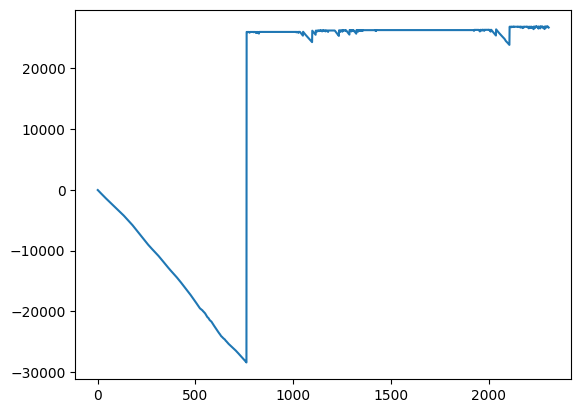

In [6]:
plt.plot(pnls)
plt.show()

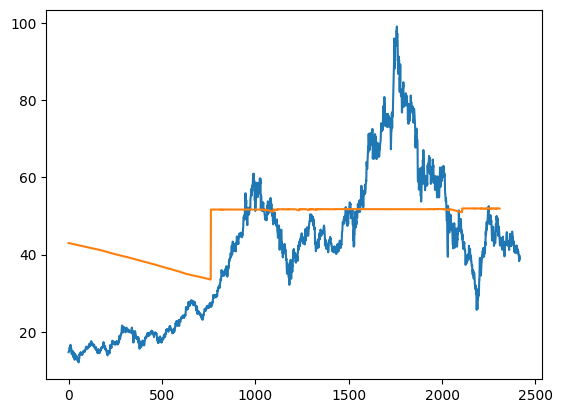

In [7]:
plt.plot(ins.close.values)
plt.plot(43 + np.array(pnls)/3000)

In [8]:
pnls[-1]/(len(pnls))

11.583091742448241

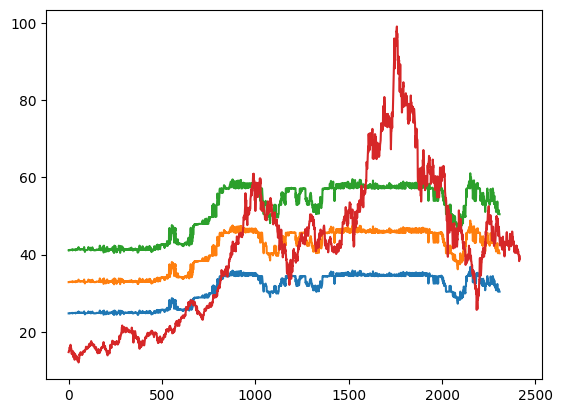

In [9]:
squad[0].see_performance(ins, training_)